
## 1. Introduction and Google's Pagerank Algorithm

In the internet, we have billions of webpages. It is highly possible that a webpage has a link to another webpage. For example, if we search "apple" in Google, there is around 12 billion results. This is an example of how Google links to other webpages.

If we treat each webpage as a vertex, we can see the internet is just a huge directed graph. Then the corrosponding adjacency matrix A is just $$(A)_{ij}=\begin{cases}
      1 & \text{if the i-th webpage links to the j-th webpage}\\
      0 & \text{otherwise}
    \end{cases}     $$

Let's do a simple example. Suppose we have a smaller group of webpages shown as the figure below.

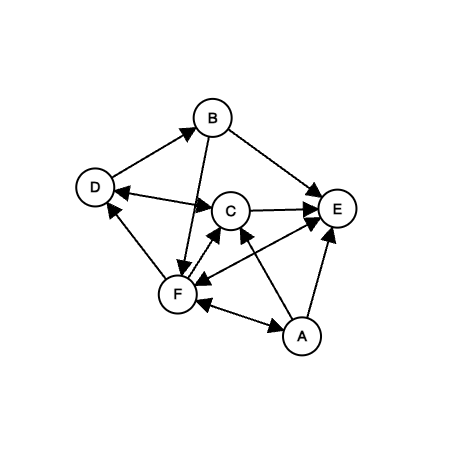

Then the adjacency matrix is just 
$$A = \left(\begin{array}{cccccc} 0 & 0 & 0 & 0 & 0 & 1
\\ 0  & 0 & 0 & 1 & 0 & 0
\\ 1  & 0 & 0 & 1 & 0 & 1
\\ 0  & 0 & 1 & 0 & 0 & 1
\\ 1  & 1 & 1 & 0 & 0 & 1
\\ 1  & 1 & 0 & 0 & 1 & 0
\end{array}\right).$$

Since the number of vertices that each vertex in the directed graph connects to varies, so the weighting of each edge or each direction may also varies. To make things simple, we can just let the total weighting of each vertex be 1, and the weighting of each edge of each vertex equals to $1/a_i$, where $a_i$ is the number of vertices where  the i-th vertex connects to. So the improved adjacency matrix is $$A' = \left(\begin{array}{cccccc} 0 & 0 & 0 & 0 & 0 & 1/4
\\ 0  & 0 & 0 & 1/2 & 0 & 0
\\ 1/3  & 0 & 0 & 1/2 & 0 & 1/4
\\ 0  & 0 & 1/2 & 0 & 0 & 1/4
\\ 1/3  & 1/2 & 1/2 & 0 & 0 & 1/4
\\ 1/3  & 1/2 & 0 & 0 & 1 & 0
\end{array}\right).$$

We can see that the sum of each colomn is all equals to 1. And this is exactly an example of Markov matrix, which we will discuss in the later sections. 

Briefly speaking, Markov matrix must have an eigenvalue 1, and a unique eigenvector corrosponding to this. Thus the 
value of i-th entry of the eigenvector determines the order of importance of the i-th vertex.

But in the reality, we may need to deal with a network that contains billions of webpages, which implies that the corrosponding adjacency martix may be a billion by a billion square matrix. It is nearly impossible to find the required eigenvector by the usual way because it is too time consuming.

So a method to appoximate this is by power iteration. The basic point is that if $ \overrightarrow{w}\ge 0$ and $|\overrightarrow{w}|=1$, then $$ \lim\limits_{k\to \infty} M^k\overrightarrow{w}=\overrightarrow{v}, \text{where M is a Markov matrix}$$

# Honours Algebra Skills Project: Title

Author: Shurui Zhang

## 2. Power iteration

**Definition** Let $A \in \mathbb{R}^{n \times n}$ be a diagonalizable matrix with eigenvalues $\lambda_1, \lambda_2, \cdots, \lambda_n$. $\lambda_1$ is called the **dominant eigenvalue** of $A$ if

$$
|\lambda_1| > |\lambda_i|,   \text{ for all } i \in \{2, 3, \cdots, n\}.
$$

**Note:** Not every diagonalizable matrix necessarily possesses a dominant eigenvalue. For example, consider the matrices below where all eigenvalues have equal magnitudes.

In [ ]:
a = var('a')
A = Matrix(2, 2, [1, a, 0, -1])
print("The Matrix A")
pretty_print(A)
print("has eigenvalues \n")
print(A.eigenvalues())

**Theorem:** If $\mathbf{v}$ is an eigenvector of a matrix $A$, then its corresponding eigenvalue is given by

$$
\lambda = \frac{\langle\, A\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle}.
$$

This quotient is called the **Rayleigh quotient**.

The proof of this theorem is straignt forward by noting

$$
\frac{\langle\, A\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \frac{\langle\, \lambda\mathbf{v}, \mathbf{v}\rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \frac{\lambda \langle\, \mathbf{v}, \mathbf{v} \rangle}{\langle\, \mathbf{v}, \mathbf{v} \rangle} = \lambda.
$$

<div class="alert alert-info">
    <h3>Exercise 2.1</h3><span class="label label-danger">(assessed)</span>
    
Using the defintion of Rayleigh quotient, write a function `Rayleigh_quotient` that takes in the matrix `A` and the vector `q` and returns the corresponding Rayleigh quotient.
</div>

In [ ]:
def Rayleigh_quotient(A, q):
    """
    Computes the Rayleigh quotient for a given matrix and eigenvector.

    Parameters:
        A (matrix): Input square matrix.
        q (vector): Eigenvector.

    Returns:
        float: Rayleigh quotient.

    """
    return (A * q).dot_product(q) / (q.dot_product(q))

In [ ]:
# Autograder test 1pt

var('a, b, c, t')

A = Matrix(2, 2, [a, c, 0, b])
q1 = vector([t, 0])
q2 = vector([0, t])

assert Rayleigh_quotient(A, q1) == a
assert Rayleigh_quotient(A, q2) == b

print("Success! Your function computes the Rayleigh quotients correctly.")

### Power Iteration Method

The Power Iteration method is an iterative algorithm used to find the dominant eigenvector and eigenvalue of a square matrix. It is particularly useful when the matrix is large and sparse.

#### Algorithm:

1. **Initialization**: Choose a random non-zero vector $\mathbf{v}_0$ as an initial approximation to the dominant eigenvector.

2. **Iteration**:
   - Repeat until convergence or a specified number of iterations:
     - Compute the matrix-vector product $\mathbf{w} = A \mathbf{v}_k$, where $A$ is the given square matrix and $ \mathbf{v}_k $ is the current approximation to the dominant eigenvector.
     - Update the approximation to the dominant eigenvector: $ \mathbf{v}_{k+1} = \frac{\mathbf{w}}{||\mathbf{w}||} $, where $||\cdot||$ denotes the Euclidean norm.

3. **Result**: After convergence, the final approximation $\mathbf{v}$ will be the dominant eigenvector of $A$, and the corresponding eigenvalue can be computed as the Rayleigh quotient.

#### Convergence:
The Power Iteration method converges to the dominant eigenvector (and corresponding eigenvalue) of a matrix under certain conditions, such as when the matrix is strictly diagonally dominant and when the matrix has a single dominant eigenvalue.

<div class="alert alert-info">
    <h3>Exercise 2.3</h3> <span class="label label-primary">(non-assessed)</span>

Discuss with the students and tutors why the power iteration algorithm works, and the conditions of the convergence. For your interest, provide a correctness proof of the power iteration method.
    
</div>

*Correctness proof*:

Since $A$ is diagonalizable, we know that it has $n$ linearly independent eigenvectors $\mathbf{v_1}, \mathbf{v_2},\cdots, \mathbf{v_n}$ with corresponding eigenvalues of $\lambda_1 > \lambda_2 \ge \lambda_3 \ge \cdots \ge \lambda_n$. Note here we assume that these eigenvalues are ordered so that $\lambda_1$ is the dominant eigenvalue (with a corresponding eigenvector of $\mathbf{v_1}$). 





Because the $n$ eigenvectors $\mathbf{v_1}, \mathbf{v_2},\cdots, \mathbf{v_n}$ are linearly independent, they must form a basis for $\mathbb{R}^n$. For the initial approximation $q_0$, we choose a nonzero vector such that the linear combination 
$$
q_0 = c_1 \mathbf{v_1} + c_2 \mathbf{v_2} + \cdots + c_n \mathbf{v_n}.
$$

with the nonzero leading coefficients. If $c_1 = 0$, the power method may not converge, and a different $q_0$ must be used as the initial approximation. 

$$
\begin{align}
A \mathbf{q_0} &= A(c_1 \mathbf{v_1} + c_2 \mathbf{v_2} + \cdots + c_n \mathbf{v_n})\\
&= c_1 A\mathbf{v_1} + c_2 A\mathbf{v_2} + \cdots + c_n A\mathbf{v_n}\\
&= c_1 \lambda_1 \mathbf{v_1} + c_2 \lambda_2 \mathbf{v_2} + \cdots + c_n \lambda_n \mathbf{v_n}
\end{align}
$$

Repeated multiplication of both sides of this equation by $A$ produces

$$
A^{k} \mathbf{q_0} = c_1 \lambda_1^k \mathbf{v_1} + c_2 \lambda_2^k \mathbf{v_2} + \cdots + c_n \lambda_n^k \mathbf{v_n},
$$

which implies

$$
A^{k} \mathbf{q_0} = \lambda_1^k(c_1 \mathbf{v_1} + c_2 (\frac{\lambda_2}{\lambda_1})^k \mathbf{v_2} + \cdots + c_n (\frac{\lambda_n}{\lambda_1})^k \mathbf{v_n}).
$$


Now, from our original assumption that $\lambda_1$ is larger in absolute value than the other eigenvalues, it follows that each of the fractions 
$$
\frac{\lambda_2}{\lambda_1}, \frac{\lambda_3}{\lambda_1}, \cdots, \frac{\lambda_n}{\lambda_1}
$$ 
is less than $1$ in absolute value. Therefore each of the factors must approach $0$ as $k$ approaches infinity. This implies that the approximation

$$
\frac{A^{k} \mathbf{q_0}}{||A^{k} \mathbf{q_0}||} \approx \mathbf{v_1},
$$

improves as k increases. Since $\mathbf{v_1}$ is a dominant eigenvector, it follows that any scalar multiple of $\mathbf{v_1}$ is also a dominant eigenvector. Thus we have shown that $\frac{A^{k} \mathbf{q_0}}{||A^{k} \mathbf{q_0}||}$ approaches the dominant eigenvector of A.

<div class="alert alert-info">
    <h3>Exercise 2.2</h3><span class="label label-primary"></span>

<span class="label label-danger">(assessed)</span> Please implement a function named `power_iteration` using the provided pseudocode for power iteration. The function should accept four parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The number of iterations `N`.
4. The desired precision `d` for rounding.

The function should return the dominant eigenvalue and eigenvector of the matrix `A`, calculated using the power iteration method with `N` iterations.
</div>

In [ ]:
def power_iteration(A, q0, N=10, d=2):
    """
    Computes the dominant eigenvector of a square matrix A using power iteration method.

    Parameters:
        A (matrix): Input square matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        N (int, optional): Number of iterations. Defaults to 10.
        d (int, optional): Number of decimal places to round the components of the resulting eigenvector. Defaults to 2.

    Returns:
        q (vector): Dominant eigenvector of the matrix A.
        l (float): Dominant eigenvalue corresponding to the dominant eigenvector.

    Note:
        - Assumes A is a square matrix.
        - Assumes q0 is a non-zero vector of the same length as A's dimension.
        - The convergence rate of the power iteration method can vary based on the matrix A.

    """
    # Normalize the initial guess vector
    q = q0.normalized()

    # Iterate N times
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()
        
        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))
    
    # Compute the eigenvalue corresponding to the dominant eigenvector
    l = Rayleigh_quotient(A, q)
    
    # Round the eigenvalue
    l = round(l, d)
    
    return l, q        

In [ ]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
expected_result1 = (3.0, vector([0.707, 0.707]))
assert power_iteration(A1, q01, d=3) == expected_result1, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
expected_result2 = (2.0, vector([0.58, 0.58, 0.58]))
assert power_iteration(A2, q02) == expected_result2, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

Please note that the power iteration method may not always converge to the desired dominant eigenvalue and eigenvector within a fixed number of iterations. An example scenario where this could happen is when the matrix `A` do not have a dominate eigenvalue, or when the dominant eigenvalue has a corresponding eigenvector that is orthogonal or nearly orthogonal to the initial vector `q`. In such cases, the power iteration method may not accurately capture the dominant eigenpair within the specified number of iterations.

<div class="alert alert-info">
    <h3>Exercise 2.3</h3> <span class="label label-primary">(non-assessed)</span>

Please give some example that the power iteration cannot find the accurate dominate eigenvalue and eigenvector given a fixed `N=10`.
    
</div>

In [ ]:
# Example one: (A^n)*q is not convergent.
A1 = Matrix([[cos(pi/2), -sin(pi/2)], [sin(pi/2), cos(pi/2)]])
q01 = vector([1,0])

print('The matrix A1 is')
pretty_print(A1)
print('The initial guess is:')
pretty_print(q01)
print('The power iteration method gives:')
pretty_print(q01, A1 * q01, A1^2 * q01, A1^3 * q01, A1^4 * q01)
print('Note that the power iteration method may not converge for any given N.')
print()


# Example two: Low convergence rate (poor selection of initial guess).
A2 = Matrix([[2, 0], [0, 1]])
q02 = vector([1e-3, 1])

print('The matrix A2 is')
pretty_print(A2)
print('The initial guess is:')
pretty_print(q02.apply_map(lambda u: round(u, 3)))

l, q = power_iteration(A2, q02)
print('The expected eigenvalue is: ', 2)
print('The computed eigenvalue is: ', l)


In previous exercises, determining the optimal number of iterations `N` to achieve the desired dominant eigenvector proved challenging. Therefore, we enhance our previous `power_iteration` function to handle non-convergence errors and determine the number of iterations required to achieve the desired precision.

<div class="alert alert-info">
    <h3>Exercise 2.4</h3><span class="label label-danger">(assessed)</span>

Modify the previous version of the `power_iteration` method to create a new function called `power_iteration_tor`. This function takes in the following parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The tolerance level for convergence `tor`.
4. The number of decimal places to round `d`.
5. The maximum number of iterations `N`.

The function returns the dominant eigenvalue $\lambda$ and the corresponding eigenvector $\mathbf{v}$ of the square matrix `A` using the power iteration method. It ensures that $||A - \lambda \mathbf{v}|| < \text{tor}$. If it is not possible to achieve convergence within the maximum number of iterations `N`, the function will raise an exception error.
</div>

In [ ]:
def error(A, eigenvalue, eigenvector):
    
    # Calculate the difference between A * eigenvector and eigenvalue * eigenvector
    difference = A * eigenvector - eigenvalue * eigenvector
    
    # Calculate the norm of the difference vector
    error_norm = difference.norm()
    
    return error_norm

In [ ]:
def power_iteration_tor(A, q0, tor=0.001, d=4, N=100):
    """
    Computes the dominant eigenvalue and eigenvector of a square matrix A using power iteration method with a tolerance criterion.

    Parameters:
        A (matrix): Input square matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        tor (float, optional): Tolerance level for convergence. Defaults to 0.001.
        d (int, optional): Number of decimal places to round the components of the resulting eigenvector and eigenvalue. Defaults to 4.
        N (int, optional): Maximum number of iterations. Defaults to 100.

    Returns:
        l (float): Dominant eigenvalue corresponding to the dominant eigenvector.
        q (vector): Dominant eigenvector of the matrix A.

    Note:
        - Assumes A is a square matrix.
        - Assumes q0 is a non-zero vector of the same length as A's dimension.
        - The convergence rate of the power iteration method can vary based on the matrix A and tolerance level.
        - Iteration continues until the change in the eigenvector's direction is negligible, as determined by the tolerance level.
        - Raises an exception if the maximum number of iterations is reached without convergence.

    """

    # Normalize the initial guess vector.
    q = q0.normalized()
    
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()

        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))

        # Compute the eigenvalue corresponding to the dominant eigenvector
        l = Rayleigh_quotient(A, q) # Compute Rayleigh quotient

        # Round the eigenvalue
        l = round(l, d)

        # Check convergence using tolerance criterion
        if error(A, l, q) < tor:
            return l, q
            
    raise Exception("The power iteration fails: not convergent within the maximum number of iterations")

In [ ]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
l1, q1 = power_iteration_tor(A1, q01, tor=1e-3)
assert (A1 * q1 - l1 * q1).norm() < 1e-3, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
l2, q2 = power_iteration_tor(A2, q02, tor=1e-4, d=5)
assert (A2 * q2 - l2 * q2).norm() < 1e-3, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

The power iteration method is capable of determining the eigenvalue with the smallest absolute value when the matrix $A$ is invertible. Suppose $A$ has eigenvalues arranged as 

$$
|\lambda_1| \ge |\lambda_2| \ge \cdots \ge |\lambda_{n-1}| > |\lambda_n|.
$$ 

This implies that $A^{-1}$ possesses eigenvalues as 

$$\biggl|\frac{1}{\lambda_n} \biggr| > \biggl| \frac{1}{\lambda_{n-1}} \biggr| \ge \cdots \ge \biggl| \frac{1}{\lambda_{1}}\biggr|,
$$ 

making $\frac{1}{\lambda_n}$ the dominant eigenvalue of $A^{-1}$. Utilizing the power iteration method on $A^{-1}$ allows the computation of $\frac{1}{\lambda_n}$, thereby providing the eigenvalue with the smallest magnitude $\lambda_n$. Furthermore, to find the eigenvalue of $A$ closest to a specified value $\lambda$, one can employ the power iteration method on $(A - \lambda I)^{-1}$.


<div class="alert alert-info">
    <h3>Exercise 2.4</h3><span class="label label-danger">(assessed)</span>

Modify the previous version of the `power_iteration_tor` method to create a new function called `power_iteration_near_t`. This function takes in the following parameters:

1. The square matrix `A`.
2. The initial vector `q`.
3. The shift valuet `t`.
3. The tolerance level for convergence `tor`.
4. The number of decimal places to round `d`.
5. The maximum number of iterations `N`.

The function returns the eigenvalue $\lambda$ that is the most close to $t$ and the corresponding eigenvector $\mathbf{v}$ of the square matrix `A` using the power iteration method. It ensures that $||A - \lambda \mathbf{v}|| < \text{tor}$. If it is not possible to achieve convergence within the maximum number of iterations `N`, the function will raise an exception error. Also note that we assume $A - \lambda I$ is invertible.
</div>

In [ ]:
def power_iteration_near_t(A, q0, t=0, tor=0.001, d=4, N=100):
    """
    Power iteration method to compute the dominant eigenpair of a matrix A near a shift t.

    Args:
        A (matrix): Input matrix.
        q0 (vector): Initial guess for the dominant eigenvector.
        t (float): Shift value (default is 0).
        tor (float): Tolerance for convergence (default is 0.001).
        d (int): Number of decimal places for rounding (default is 4).
        N (int): Maximum number of iterations (default is 100).

    Returns:
        tuple: Tuple containing the dominant eigenvalue and its corresponding eigenvector.

    Raises:
        Exception: If the power iteration fails to converge within the maximum number of iterations.
    """
        
    n = A.nrows()
    
    # Apply shift
    A = A - t * matrix.identity(n)
    
    # Invert the shifted matrix
    A = A.inverse() 
    
    # Normalize the initial guess vector.
    q = q0.normalized()
    
    for _ in range(N):
        # Perform matrix-vector multiplication and normalize the result
        q = (A * q).normalized()

        # Apply rounding to components of the eigenvector
        q = q.apply_map(lambda u: round(u, d))

        # Compute the eigenvalue corresponding to the dominant eigenvector
        l = Rayleigh_quotient(A, q) # Compute Rayleigh quotient

        # Round the eigenvalue
        l = round(l, d)

        # Check convergence using tolerance criterion
        if error(A.inverse(), 1/l, q) < tor:
            return t + 1/l, q
            
    raise Exception("The power iteration fails: not convergent within the maximum number of iterations")

In [ ]:
# Autograder test 1pt

# Test case 1
A1 = Matrix([[2, 1], [1, 2]])
q01 = vector([1, 0])
expected_result1 = (1.0, vector([0.707, -0.707]))
assert power_iteration_near_t(A1, q01, d=3) == expected_result1, "Test case 1 failed"

# Test case 2
A2 = Matrix([[1, 0, 1], [0, 1, 1], [1, 1, 0]])
q02 = vector([1, 0, 0])
expected_result2 = (-1.0, vector([0.4084, 0.4081, -0.8165]))
assert power_iteration_near_t(A2, q02, t=-0.5, d=4) == expected_result2, "Test case 2 failed"

print("Success! Your function computes the eigenvalues and eigenvectors correctly.")

## 3. Markov Matrix


Markov matrix provides information about how each node (webpage in the context of Google PageRank) communicates with one another. Lemma 4.7.6 ensures us that any Markov matrix has an eigenvalue of 1. In fact, 1 is also the largest eigenvalue of this Markov matrix. Here, we can utilize Sage functionalities to run a large number of cases and verify this.

Given a Markov matrix M, we may use `pretty_print()` to make it nicely presented.

In [ ]:
M = matrix(QQ,4,4,[1/3,1/2,0,1/4, 1/3,0,0,1/4, 0,1/2,0,1/4, 1/3,0,1,1/4 ])
pretty_print(M)

Return the list of eigenvalues by `eigenvalues()` and select the largest one by `max()`.

In [ ]:
max(M.eigenvalues())

You can freely substitute any other Markov matrix for M to check if its largest eigenvalue is still 1. However, manually typing a matrix is time-consuming, so we need a function that automatically generates a random Markov matrix. Note that in this notebook, we assume all entries of the matrix are rational numbers for convenience.

<div class="alert alert-info">
    <h3>Exercise 3.1</h3><span class="label label-danger">(assessed)</span> 2pts

Write a function `markov_matrix_generator` which takes in `n` as the size of the matrix and returns a random Markov matrix.

Caution: Markov matrices often are expressed with row sums being one; here we have column sums being one. 
</div>

In [ ]:
#your code here
def markov_matrix_generator(n):
    '''
    This function should return a random Markiv matrix of size n.
    '''
    entries = []
    
    # Iterate for n rows
    for i in range(n):
        
        # Initialize each row
        row = [0]*n
        
        # Random number of nonzero entries in a row
        num_of_nonzero  = randint(1,n)
        
        # Sum of a row
        s = 0
        
        # List of nonzero entries
        nonzero_in_rows = []
        
        # Interate to generate each nonzero entry in a row
        for j in range(num_of_nonzero):
            
            # The random entry
            r = random()
            
            # Sum up for later nomorlization
            s += r
            
            nonzero_in_rows.append(r)
            
        # Normalize to ensure that sum of a row is 1
        nonzero_in_rows = [number/s for number in nonzero_in_rows]
        
        # Replace the initialize row with the one randomly generated
        row[0:num_of_nonzero] = nonzero_in_rows
        
        # Randomly ditribute the nonzero entries
        shuffle(row)
        
        
        entries.append(row)
             
    # Return the tranpose of the matrix as we want the column sum to be 1
    return matrix(QQ,n,n,entries).transpose()
        
    

In [ ]:
#Here's a cell to experiment whether your code works
pretty_print(markov_matrix_generator(3))
pretty_print(markov_matrix_generator(4))


In [ ]:
#Autograder test cell 
M = markov_matrix_generator(4)
column_sum = sum(M)
for i in column_sum:
    assert round(i,6) == 1
    
M = markov_matrix_generator(12)
column_sum = sum(M)
for i in column_sum:
    assert round(i,6) == 1
    
print("Success! Your function generates random Markov matrix correctly.")

Now you may play with the `markov_matrix_generator` function to check its largest eigenvalue.

<div class="alert alert-info">
    <h3>Exercise 3.2</h3><span class="label label-primary">(non-assessed)</span>

Conduct enough experiments to convince yourself that for any Markov matrix, its largest eigenvalue is 1. Discuss with your partner why this result holds. 
    
Hint: you may check Gershgorin circle theorem.

In [ ]:
#your code here

# Test for n = 1,2,3,...10
for i in range(2,11):
    # For each n, experiment 100 times
    for j in range(100):
        M = markov_matrix_generator(i)
        
        # Check for the case that expected result does not hold
        if round(max(M.eigenvalues()),6) != 1.0:
            print("There is a matrix that its largest eigenvalue is not 1.")
            break;

print("All cases match the expected result!")

***Answer for reference:***

Gershgorin circle theorem stats that:

Let $A$ be a complex $n \times n$ matrix, with entries $a_{ij}$. For $i \in \{1, \ldots, n\}$ let $R_i$ be the sum of the absolute values of the non-diagonal entries in the $i$-th row:

$$ R_i = \sum_{j \neq i}^n |a_{ij}|.$$

Let $D(a_{ii}, R_i) \subseteq \mathbb{C}$ be a closed disc centered at $a_{ii}$ with radius $R_i$. Such a disc is called a Gershgorin disc. Then every eigenvalue of $A$ lies within at least one of the Gershgorin discs $D(a_{ii}, R_i)$.

Let $M$ be an arbitrary $n \times n$ Markov matrix and then we consider $M^T$. Let $i$ be arbitrary where $1 \leq i \leq n$, then

$$R_i = \sum_{j \neq i}^n |m_{ij}| = 1-m_{ii},$$

since the row sum of $M^T$ is 1. Then any eigenvalue $\lambda$ of $M$ lies within the Gershgorin discs $D(m_{ii}, 1-m_{ii})$. Equivalently,

$$2m_{ii} - 1 \leq \lambda \leq 1.$$

And since all entries of $M$ satisfy $0\leq m_{ij} \leq 1$,

$$ |\lambda| \leq 1.$$

So all eigenvalues of $M^T$ have absolute values less than or equal to one. As square matrices share the same eigenvalues as their transposes, the same conclusion holds for $M$.

Finally, combining Lemma 4.7.6 from the course notes, which states that $1$ is an eigenvalue for all Markov matrices, we conclude that for all Markov matrices, $1$ is the largest eigenvalue.